This notebook is used to build models for the credit card fraud detection task.


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:

# Load the data
df = pd.read_csv("../data/creditcard.csv")

# Separate features and target
X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:

# Feature selection
selector = SelectKBest(f_classif, k=15)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)


In [9]:
# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = rf_classifier.predict(X_test_selected)
y_pred_proba = rf_classifier.predict_proba(X_test_selected)[:, 1]

In [10]:

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Plot feature importances
feature_importance = pd.DataFrame({
    'feature': selector.get_feature_names_out(),
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

# Plot ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Confusion Matrix:
[[56849    15]
 [   16    82]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962


ROC AUC Score: 0.9688747157557452


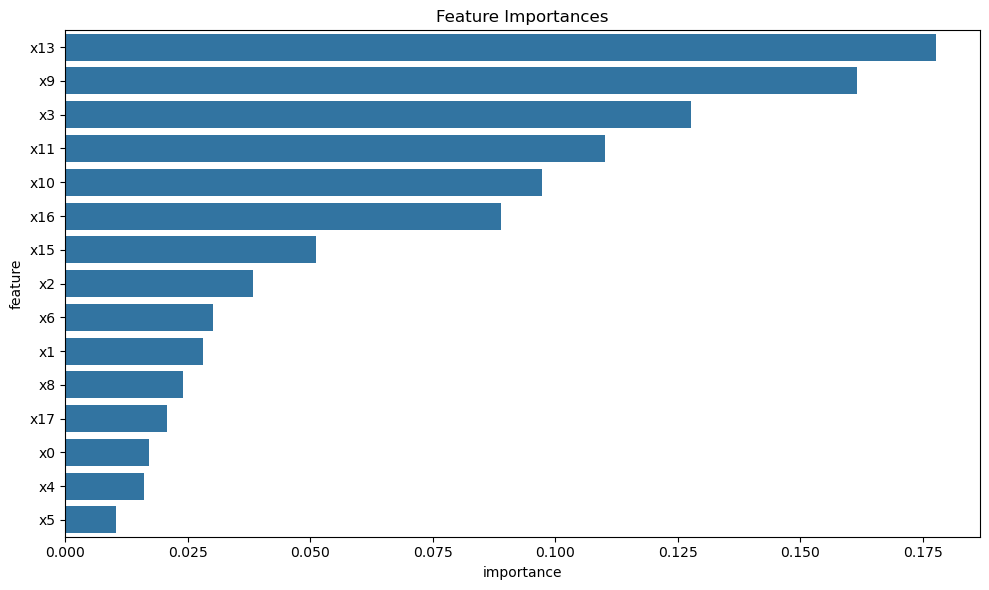

In [11]:
# Plot feature importances
feature_importance = pd.DataFrame({
    'feature': selector.get_feature_names_out(),
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

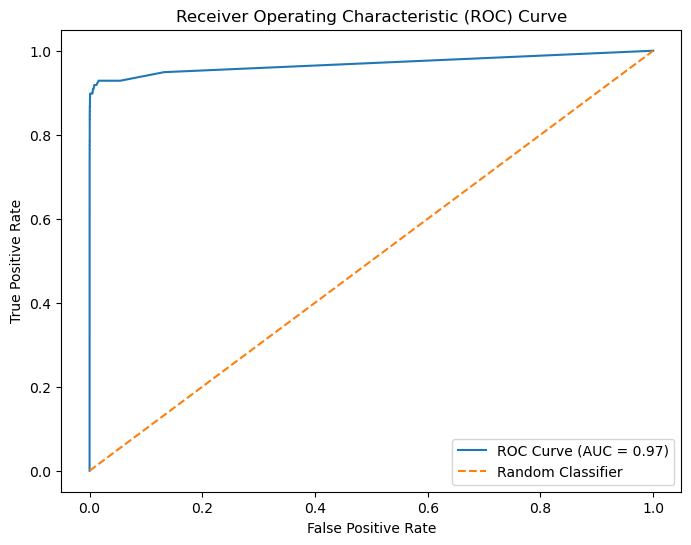

In [12]:

# Plot ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Testing other models

In [14]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=10, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}


In [15]:
# Train and evaluate models
results = {}
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions
    y_pred = model.predict(X_test_selected)
    y_pred_proba = model.predict_proba(X_test_selected)[:, 1]
    
    # Calculate metrics
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    
    results[name] = {'F1 Score': f1, 'AUC-ROC Score': auc_roc}
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_roc:.2f})')


: 

: 

In [ ]:
# Finalize and show ROC plot
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [ ]:

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

In [ ]:

# Plot feature importances for Random Forest
rf_classifier = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': selector.get_feature_names_out(),
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

In [ ]:

# Print detailed classification report for the best model
best_model_name = results_df['F1 Score'].idxmax()
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_selected)
print(f"\nDetailed Classification Report for {best_model_name}:")
print(classification_report(y_test, y_pred_best))